In [8]:
import pandas_datareader.data as web
import numpy as np

#获取月度数据
df = web.DataReader(['FEDFUNDS', 'CPILFESL'], "fred", "2000-01-01", "2023-12-31")
df = df.ffill().dropna()

#对CPI取对数差分，计算通胀率
df['INFLATION'] = np.log(df['CPILFESL']).diff() * 100
df = df.dropna()

# 准备用于建模的数据
model_data = df[['FEDFUNDS', 'INFLATION']]
print(model_data.head())


            FEDFUNDS  INFLATION
DATE                           
2000-02-01      5.73   0.055757
2000-03-01      5.85   0.333890
2000-04-01      6.02   0.166528
2000-05-01      6.27   0.221607
2000-06-01      6.53   0.221117


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, Sep, 2025
Time:                     12:22:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.38122
Nobs:                     285.000    HQIC:                  -8.45800
Log likelihood:           413.791    FPE:                0.000201571
AIC:                     -8.50938    Det(Omega_mle):     0.000194680
--------------------------------------------------------------------
Results for equation FEDFUNDS
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.007036         0.015918            0.442           0.658
L1.FEDFUNDS          1.691253         0.044158           38.300           0.000
L1.INFLATION        -0.028278         0.075033           -0.3

G:\Anaconda3\envs\economic_analyzer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


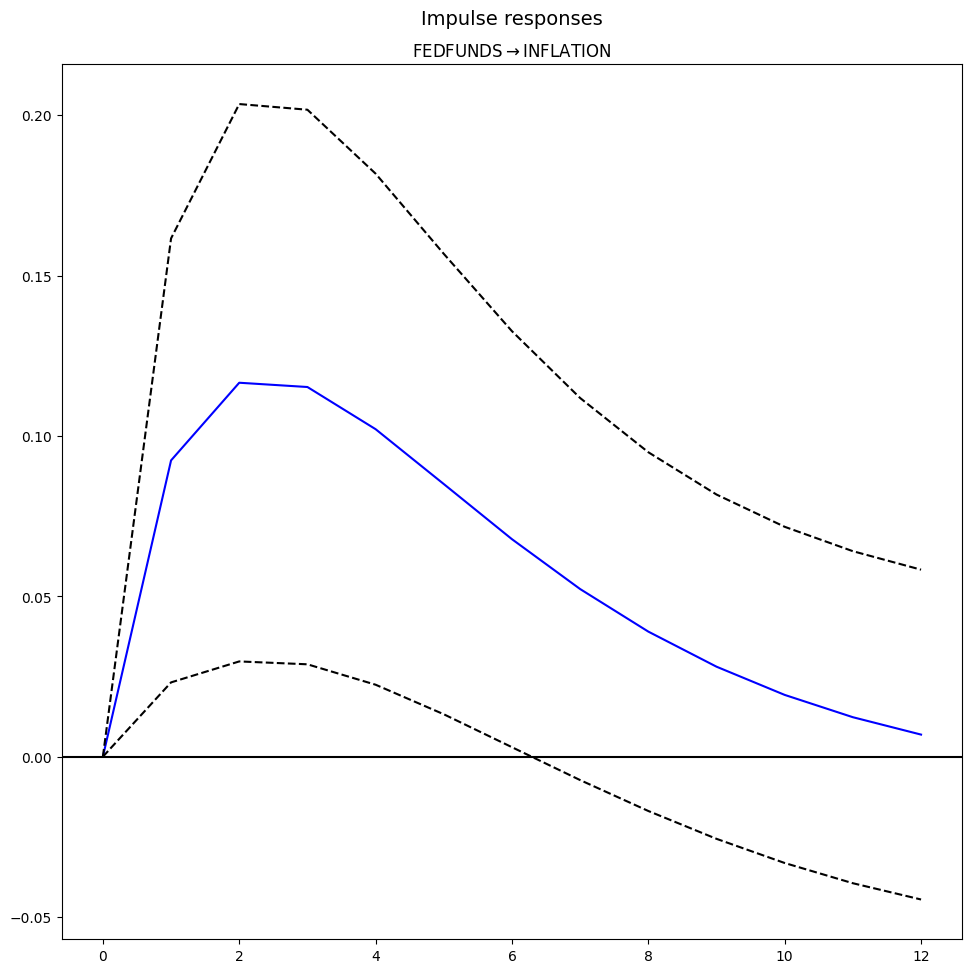

In [14]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# 训练VAR模型
model = VAR(model_data)
# .fit(2) 表示考虑过去2个月的滞后影响
results = model.fit(2) 
print(results.summary())

# 计算脉冲响应函数
# .irf(12) 表示看未来12个月的冲击影响
irf = results.irf(12)

# 画出利率（FEDFUNDS）冲击对通胀（INFLATION）的影响图
# plot的第一个参数是被冲击的变量，第二个是响应的变量
irf.plot(impulse='FEDFUNDS', response='INFLATION', orth=False)
plt.show()